# May ??, 2022 (create ca vid)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from numpy.ma import masked_where as mwh
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
_fig_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = 'Documents/workspaces/lfr/binary_overlapping'
lfr_dir = pjoin(os.environ['HOME'], lfr_dir)

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# RABIES
sys.path.insert(0, pjoin(git_dir, 'RABIES'))
from rabies.confound_correction_pkg.utils import butterworth as rb_butter

# set style & no interpolalation
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [9]:
b0 = (0.01, 0.5)
bands = [b0]

In [11]:
task = 'rest'

file_names = {
    b: '_'.join([
        'key',
        f"task-task",
        f"space-spacedim",
        f"desc-bp{b if isinstance(b, tuple) else (b, fs / 2)}".replace(' ', ''),
        'mode',
    ]) for b in bands
}
file_names

{(0.01, 0.5): 'key_task-task_space-spacedim_desc-bp(0.01,0.5)_mode'}

In [14]:
bands = [0.01, 0.5, b0]
fs = 10

In [15]:
file_names = {
    b: '_'.join([
        'key',
        f"task-task",
        f"space-spacedim",
        f"desc-bp{b if isinstance(b, tuple) else (b, fs / 2)}".replace(' ', ''),
        'mode',
    ]) for b in bands
}
file_names

{0.01: 'key_task-task_space-spacedim_desc-bp(0.01,5.0)_mode',
 0.5: 'key_task-task_space-spacedim_desc-bp(0.5,5.0)_mode',
 (0.01, 0.5): 'key_task-task_space-spacedim_desc-bp(0.01,0.5)_mode'}

## 128 * 3

In [16]:
mice = Mice(Config(128, 3, exclude=0))
mice.setup_func_data('rest', runs_only=True)

NameError: name 'Mice' is not defined

### Anim = 10

In [135]:
key = mice.get_key(10, 3, 1)
base = Base(mice, key=key, mode='ca2', prep_data=True)

In [136]:
base.data.shape

(154, 6000)

[<matplotlib.lines.Line2D object at 0x7f94cbad40a0>]

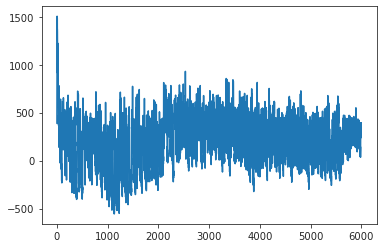

In [137]:
plt.plot(base.data[70])

### Anim = 5

In [141]:
key = mice.get_key(5, 3, 1)
base = Base(mice, key=key, mode='ca2', prep_data=True)

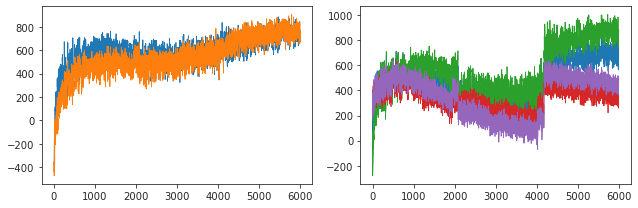

In [206]:
fig, axes = create_figure(1, 2, (9, 3))
axes[0].plot(base.data[[74, 75]].T, alpha=1, lw=0.8)
axes[1].plot(base.data[[70, 71, 72, 73, 76]].T, alpha=1, lw=0.8)

plt.show()

In [249]:
aaa = dict(np.array(list(base.n2l.items()))[70:77])
aaa

{
    '70': '1-117-0',
    '71': '1-118-0',
    '72': '1-119-0',
    '73': '1-121-0',
    '74': '1-122-0',
    '75': '1-123-0',
    '76': '1-125-0'
}

In [250]:
bbb = {
    int(n): mice.parcel.encode(lbl)
    for n, lbl in aaa.items()
}
bbb

{70: 117, 71: 118, 72: 119, 73: 121, 74: 122, 75: 123, 76: 125}

In [238]:
from register.register import Register
reg = Register(mice)
reg.set_mode('ca2')

In [239]:
key = mice.get_key(5, 3)
obj = reg.load_obj_masks(key)
x = obj['cols'].numpy()

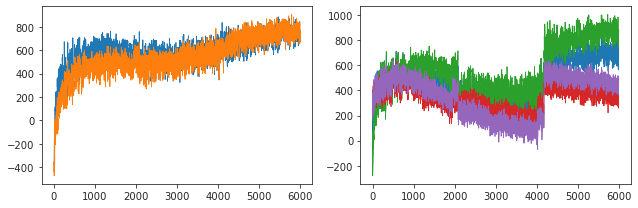

In [242]:
fig, axes = create_figure(1, 2, (9, 3))
axes[0].plot(base.data[[74, 75]].T, alpha=1, lw=0.8)
axes[1].plot(base.data[[70, 71, 72, 73, 76]].T, alpha=1, lw=0.8)

plt.show()

In [251]:
bbb

{70: 117, 71: 118, 72: 119, 73: 121, 74: 122, 75: 123, 76: 125}

<matplotlib.image.AxesImage object at 0x7f94cb0dda90>

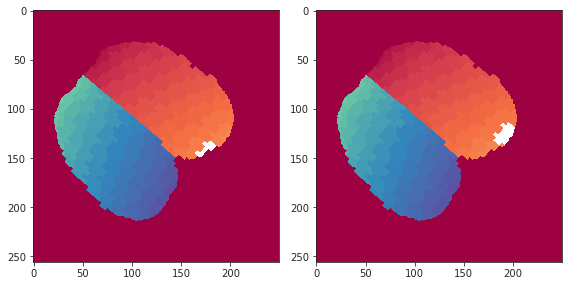

In [260]:
fig, axes = create_figure(1, 2, (8, 4))
axes[0].imshow(mwh(np.isin(x, [bbb[i] for i in [74, 75]]), x), cmap='Spectral')
axes[1].imshow(mwh(np.isin(x, [bbb[i] for i in [70, 71, 72, 73, 76]]), x), cmap='Spectral')

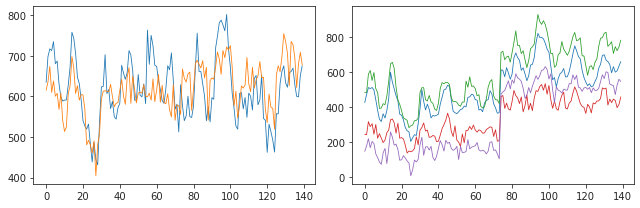

In [265]:
fig, axes = create_figure(1, 2, (9, 3))
axes[0].plot(base.data[[74, 75]][:, 4100:4240].T, alpha=1, lw=0.8)
axes[1].plot(base.data[[70, 71, 72, 73, 76]][:, 4100:4240].T, alpha=1, lw=0.8)

plt.show()

In [278]:
f = 'sub-SLC05_ses-3_task-rest_run-1_space-individual_desc-preproc_ca2.nii.gz'
f = pjoin(mice.cfg.raw_dir, f)
img = ants.image_read(f)

In [279]:
x = img.numpy()[..., 4178 - 30:4178 + 31]
x.shape

(256, 250, 1, 61)

In [280]:
from register.register import reset_ants_img
img = reset_ants_img(x, img.spacing, img.origin, img.dtype, use_um=False)

In [281]:
ants.image_write(img, pjoin(tmp_dir, f'{key}_run-1_ca_cut.nii.gz'))

In [282]:
4178 - 30, 4178 + 31

(4148, 4209)